<h2 style="color:green" align="center">Le machine Learning avec Python: Régression linéaire avec une variable</h2>

<h3 style="color:purple">Exemple de problème de prévision du prix d'une maison</h3>

Le tableau ci-dessous représente les prix actuels des maisons dans le canton en fonction de la superficie en pieds carrés

<img src="homepricetable.JPG" style="width:370px;height:250px">

**Énoncé du problème**: les données ci-dessus permettent de créer un modèle d'apprentissage automatique capable de prédire les prix des maisons en fonction de la superficie en pieds carrés


Vous pouvez représenter les valeurs du tableau ci-dessus sous forme de nuage de points (les valeurs sont indiquées par des marqueurs rouges). Après cela, on peut tracer une ligne droite qui correspond le mieux aux valeurs du graphique.

<img src="scatterplot.JPG" style="width:600px;height:370px">

Vous pouvez dessiner plusieurs lignes comme celle-ci mais nous choisissons celle où la somme totale des erreurs est minimale

<img src="equation.PNG" style="width:600px;height:370px" >

<img src="linear_equation.png" >

In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('homeprices.csv')
#afficher dataframe 
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


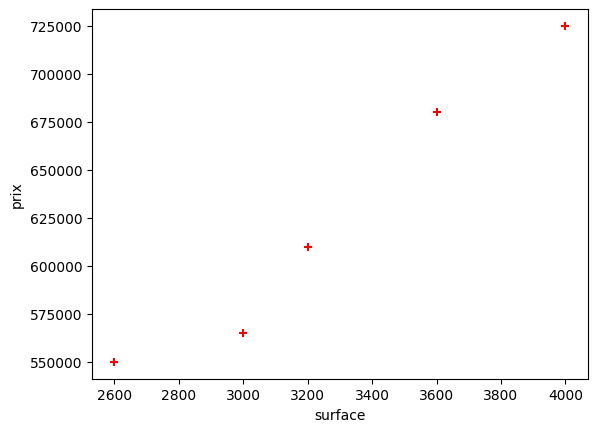

In [4]:
%matplotlib inline
plt.xlabel('surface')
plt.ylabel('prix')
plt.scatter(df.area,df.price,color='red',marker='+')

In [5]:
price = df.drop('area',axis='columns')
price

,price
0,550000
1,565000
2,610000
3,680000
4,725000


In [6]:
area = df.drop('price',axis='columns')
area

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [7]:
df



,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [8]:
donnees=df.values
print(donnees) #donnees




[[  2600 550000]
 [  3000 565000]
 [  3200 610000]
 [  3600 680000]
 [  4000 725000]]


In [9]:
# Create linear regression object
X=donnees[:,:1]
print("X")
print(X)
y=donnees[:,1:]
y=np.ravel(y)
print("y")
print(y)

reg = linear_model.LinearRegression()
reg1=reg.fit(X,y)



X
[[2600]
 [3000]
 [3200]
 [3600]
 [4000]]
y
[550000 565000 610000 680000 725000]


In [10]:
reg2=reg.fit(area,price)

**(1) Estimer le prix  d'une maison avec area = 3300 sqr ft**

In [11]:

reg1.predict([[3300]])

/home/gaaku/sklearn-env/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[628715.75342466]])

In [12]:
reg2.predict([[3300]])

/home/gaaku/sklearn-env/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[628715.75342466]])

In [13]:
reg1.coef_

array([[135.78767123]])

In [14]:
reg.intercept_

array([180616.43835616])

**Y = m * X + b (m est le coffecient  et  b est  l'intercept)**

In [15]:
3300*135.78767123 + 180616.43835616432

628715.7534151643

**(1) Prevoir le prix d'une maison avec  area = 5000 sqr ft**

In [16]:

reg.predict([[5000]])

/home/gaaku/sklearn-env/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[859554.79452055]])

<h3 style="color:purple"> Générer un fichier  CSV pour les estimations de maisons</h3>

In [17]:
area_df = pd.read_csv("areas.csv")
area_df.head(3)

,area
0,1000
1,1500
2,2300


In [18]:
p = reg.predict(area_df)
p

array([[ 316404.10958904],
       [ 384297.94520548],
       [ 492928.08219178],
       [ 661304.79452055],
       [ 740061.64383562],
       [ 799808.21917808],
       [ 926090.75342466],
       [ 650441.78082192],
       [ 825607.87671233],
       [ 492928.08219178],
       [1402705.47945205],
       [1348390.4109589 ],
       [1144708.90410959]])

In [19]:
area_df['prices']=p
area_df

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [20]:
area_df.to_csv("prediction.csv")

<h3>Exercise</h3>

<p >Téléchargez le fichier "canada_per_capita_income.csv" où il y a des revenus au Canada jusqu'au 2016. Créez un modèle de régression et prédisez le revenu par habitant des citoyens canadiens en 2020, ... 2025</p>
    